In [9]:
import sys
import os

%load_ext autoreload
%autoreload 2
    
sys.path.append('../scripts/')
from entities import *
from commands import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dataPath = '../../datasets/Gutenberg/txt'
outDir = "../results/book_parses"
plotDir = "../results/plots"
title = 'Beatrix Potter___The Tale Of Benjamin Bunny'
fileName = os.path.join(dataPath, title + ".txt")
outFileName = os.path.join(outDir, f'{title}_parsed.json')
p, book = parse_book(fileName, verbose=True)
with open (outFileName, 'w') as outFile:
    json.dump(book.to_json(), outFile, separators=(',', ':'), indent=4)
p.close()

===================Begin Parsing======================
../../datasets/Gutenberg/txt/Beatrix Potter___The Tale Of Benjamin Bunny.txt



In [12]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [15]:
def get_char_ments(charName, book):
    unique_ments = set()
    for ment in book.corefs[charName]['mentions']:
        unique_ments.add((ment[1], ment[2]))
    return unique_ments

def get_emo_traj(charName, book):
    emos = []
    times = []
    emo_dict = {"pos" : 1, "neg" : -1, "amb" : 0}
    unique_ments = get_char_ments(charName, book)
    for par_id, chunk in enumerate(book.sentences):
        for sent_id, sent in enumerate(chunk):
            if ((par_id, sent_id) in unique_ments) or charName in sent.text.lower():
                emos.append(emo_dict[sent.emotion_tags.mini_emotion]) #* sent.emotion_tags.probability)
            else:
                if len(emos) > 1:
                    emos.append(emos[-1])
                else:
                    emos.append(0)
    return emos

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


def plot_emos(charName, book, smoothingVals):
    emos = get_emo_traj(charName, book)
    plt.rcParams.update({'font.size': 22})
    
    for smoothingVal in smoothingVals:
        smoothed_emos = moving_average(emos, smoothingVal+1)
        plt.figure(figsize=(15,15))
        plt.title("Smoothed Trajectory of " + charName)
        plt.xlabel("Narrative Time")
        plt.ylabel("Sentiment")
        scaled_smoothed_emos = (smoothed_emos - (smoothed_emos.min()) ) /\
            (0.5 *(smoothed_emos.max() - smoothed_emos.min()) ) - 1
        normalized_time = np.arange(scaled_smoothed_emos.shape[0]) / scaled_smoothed_emos.shape[0]
        plt.plot(normalized_time, scaled_smoothed_emos)
        plotFilleName = charName + "_traj_mentions_" + str(smoothingVal) + "_smoothing.jpg"
        plt.savefig(os.path.join(plotDir, plotFilleName))

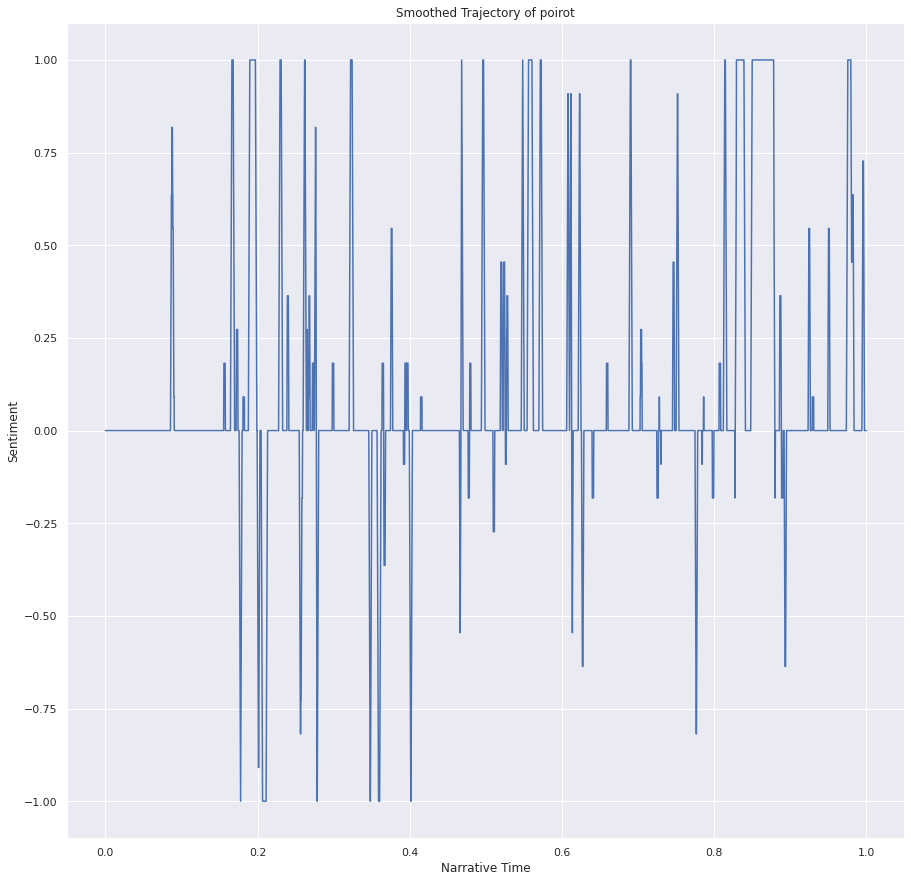

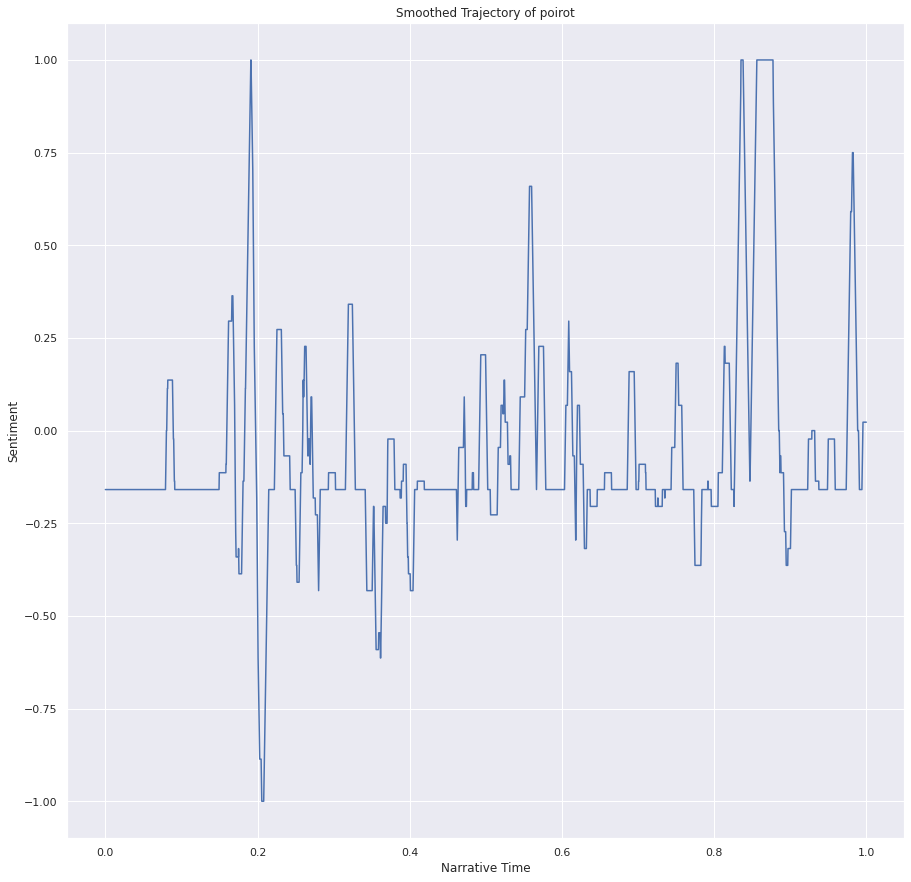

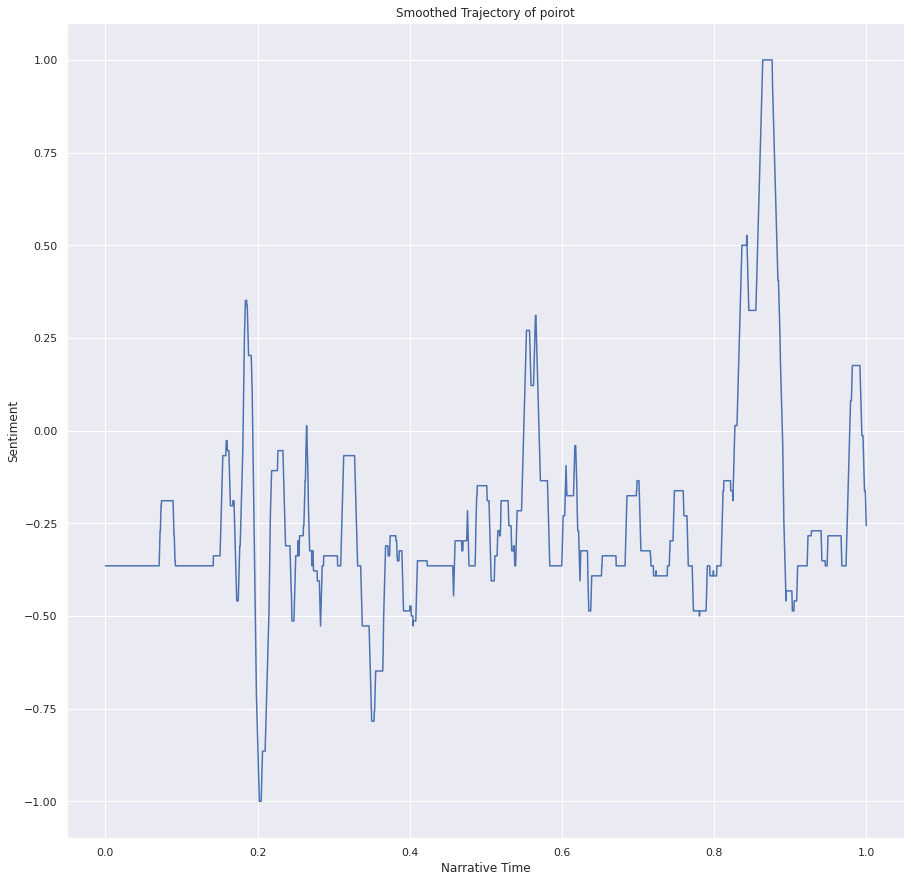

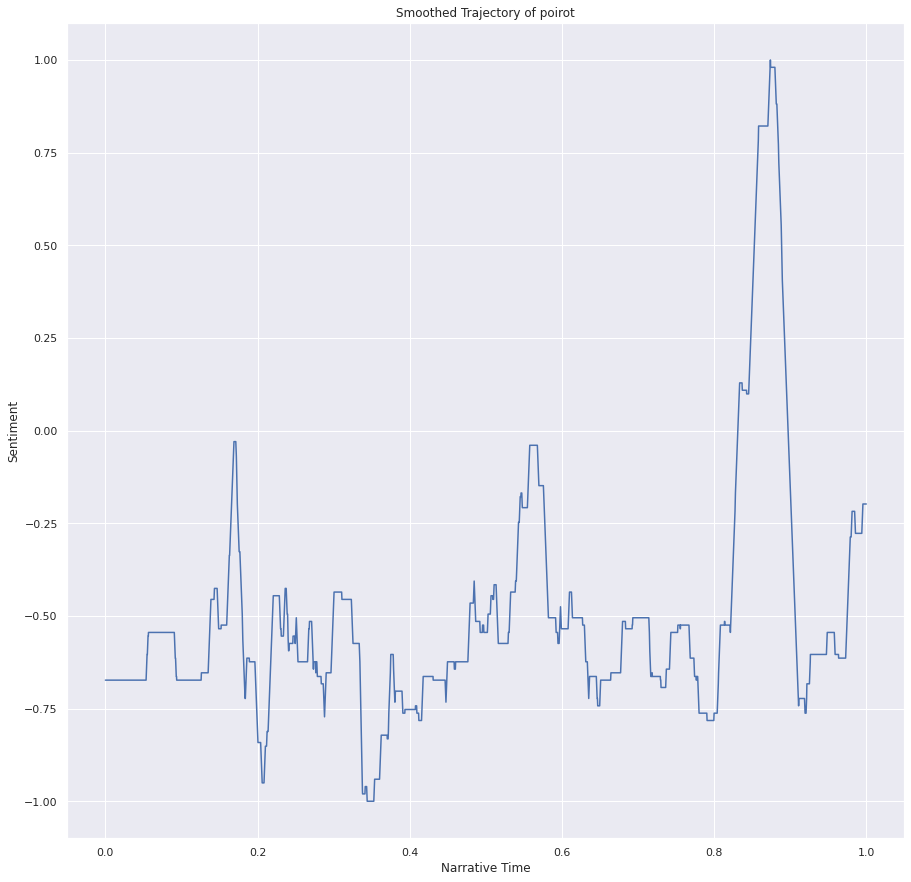

In [14]:
plot_emos("poirot", book, [10, 50, 100, 200])

In [ ]:
# with open ("test.json", 'r') as inFile:
#     book_read = json.load(inFile)

In [ ]:
# emoLexFile = "../../datasets/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.tsv"

In [ ]:
# emoLex_df = pd.read_csv(emoLexFile, sep="\t")
# emoLex_df = emoLex_df[emoLex_df["emotion"].isin(["positive", "negative"]) & \
#                      emoLex_df["val"]==1][["word", "emotion"]]

In [ ]:
# emoLex_dict = emoLex_df.set_index('word')["emotion"].to_dict()

In [ ]:
# i = 0
# for word, loc in book.corefs['bartleby']['agents']:
#     if word in emoLex_dict:
#         i += 1
#         print(i, loc, word, emoLex_dict[word])
#     else:
#         pass
#         #print("none ", word)